# Корреляция

корелляция - измерение линейной зависимости двух переменных

$${\displaystyle r_{xy}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$$

Здесь верх - насколько отклонение от среднего совпадает по знаку, а низ - масштабирует

* Корелляция =1 - идеальная позитивная корелляция
* Корелляция = -1 - идевльная негативная корелляция
* Корелляция = 0 - абсолютное отсутствие корелляции между двумя переменными (что не означает что они независимы)

In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd

In [3]:
path = '../data/l5/201801-citibike-tripdata.csv.zip'
df = pd.read_csv(path, parse_dates=['starttime', 'stoptime'])
df['tripduration']  /= 60

In [4]:
mask = df.tripduration <= 60 # less than an hour

In [5]:
# df = df[mask]

In [6]:
def _minutes_till_midnight(col):
    return col.dt.hour * 60 + col.dt.minute

In [7]:
df['start_minutes'] = _minutes_till_midnight(df['starttime'])
df['stop_minutes'] = _minutes_till_midnight(df['stoptime'])

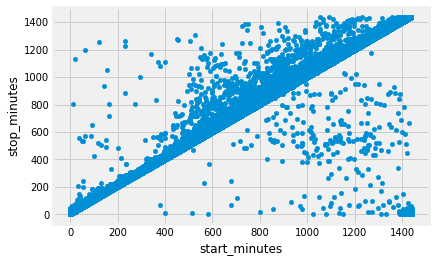

In [8]:
df.plot(kind='scatter', x='start_minutes', y='stop_minutes')

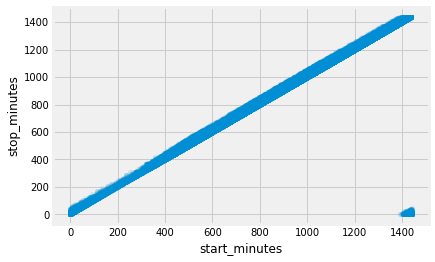

In [9]:
df[mask].plot(kind='scatter', x='start_minutes', y='stop_minutes', alpha=.1)

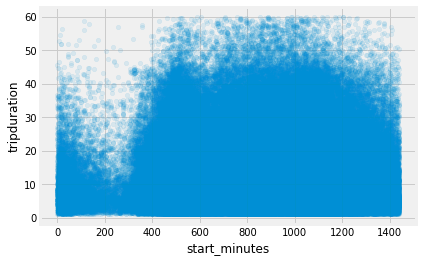

In [10]:
df[mask].plot(kind='scatter', x='start_minutes', y='tripduration', alpha=.1)

In [11]:
df['start_minutes'].corr(df['tripduration'])

-7.263682946111404e-05

## Age

In [12]:
age_mask = df['birth year'] > 1930

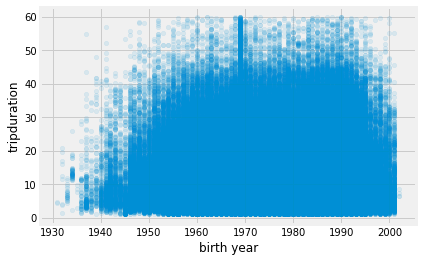

In [13]:
df[mask & age_mask].plot(kind='scatter', x='birth year', y='tripduration', alpha=.1)

In [14]:
m = mask & age_mask
df.loc[m, 'start_minutes'].corr(df.loc[m, 'birth year'])

0.050536847421760095

In [15]:
df.corr().style.background_gradient(cmap='coolwarm')

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,start_minutes,stop_minutes
tripduration,1,0.00310672,0.00130581,0.00388124,0.00311193,0.000798424,0.00142102,-0.000824463,-0.00431063,-0.0043994,-7.26368e-05,0.000186188
start station id,0.00310672,1,0.118697,0.480219,0.391025,0.0899508,0.400624,-0.0135826,-0.0076008,0.00647549,-0.0238719,-0.0224382
start station latitude,0.00130581,0.118697,1,0.299082,0.0799924,0.941029,0.2622,-0.0145324,-0.0369709,-0.0290107,-0.0167529,-0.0155123
start station longitude,0.00388124,0.480219,0.299082,1,0.396819,0.26452,0.730355,-0.0215009,0.0652624,0.00766317,-0.0350914,-0.0347191
end station id,0.00311193,0.391025,0.0799924,0.396819,1,0.107718,0.482341,-0.0126416,0.00342409,0.0101041,0.0257624,0.0255832
end station latitude,0.000798424,0.0899508,0.941029,0.26452,0.107718,1,0.301957,-0.0128133,-0.0370437,-0.0276378,-0.0137732,-0.0125435
end station longitude,0.00142102,0.400624,0.2622,0.730355,0.482341,0.301957,1,-0.0175374,0.0619592,0.00588179,0.0343142,0.0322345
bikeid,-0.000824463,-0.0135826,-0.0145324,-0.0215009,-0.0126416,-0.0128133,-0.0175374,1,0.000824304,-0.032753,-0.00229768,-0.00187281
birth year,-0.00431063,-0.0076008,-0.0369709,0.0652624,0.00342409,-0.0370437,0.0619592,0.000824304,1,0.0959992,0.0477636,0.0432813
gender,-0.0043994,0.00647549,-0.0290107,0.00766317,0.0101041,-0.0276378,0.00588179,-0.032753,0.0959992,1,-0.0182366,-0.0186161


In [16]:
import seaborn as sns
import numpy as np

sns.set(style="white")

In [17]:
corr = df.corr()

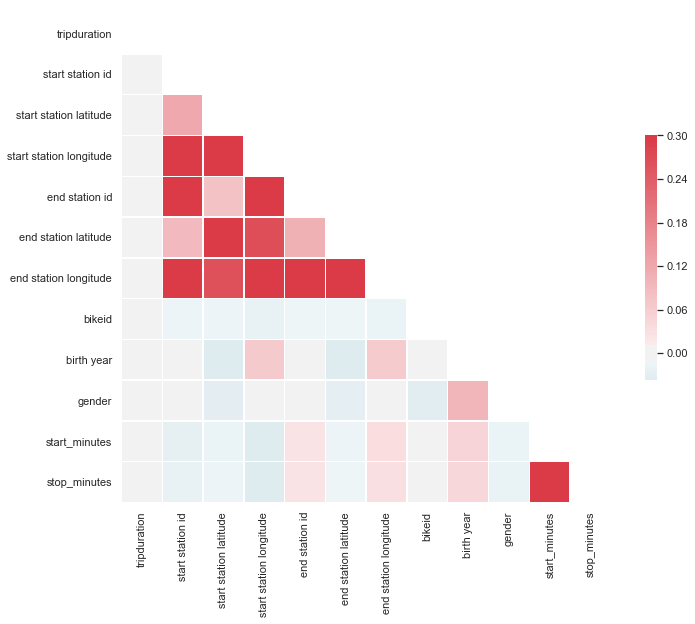

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

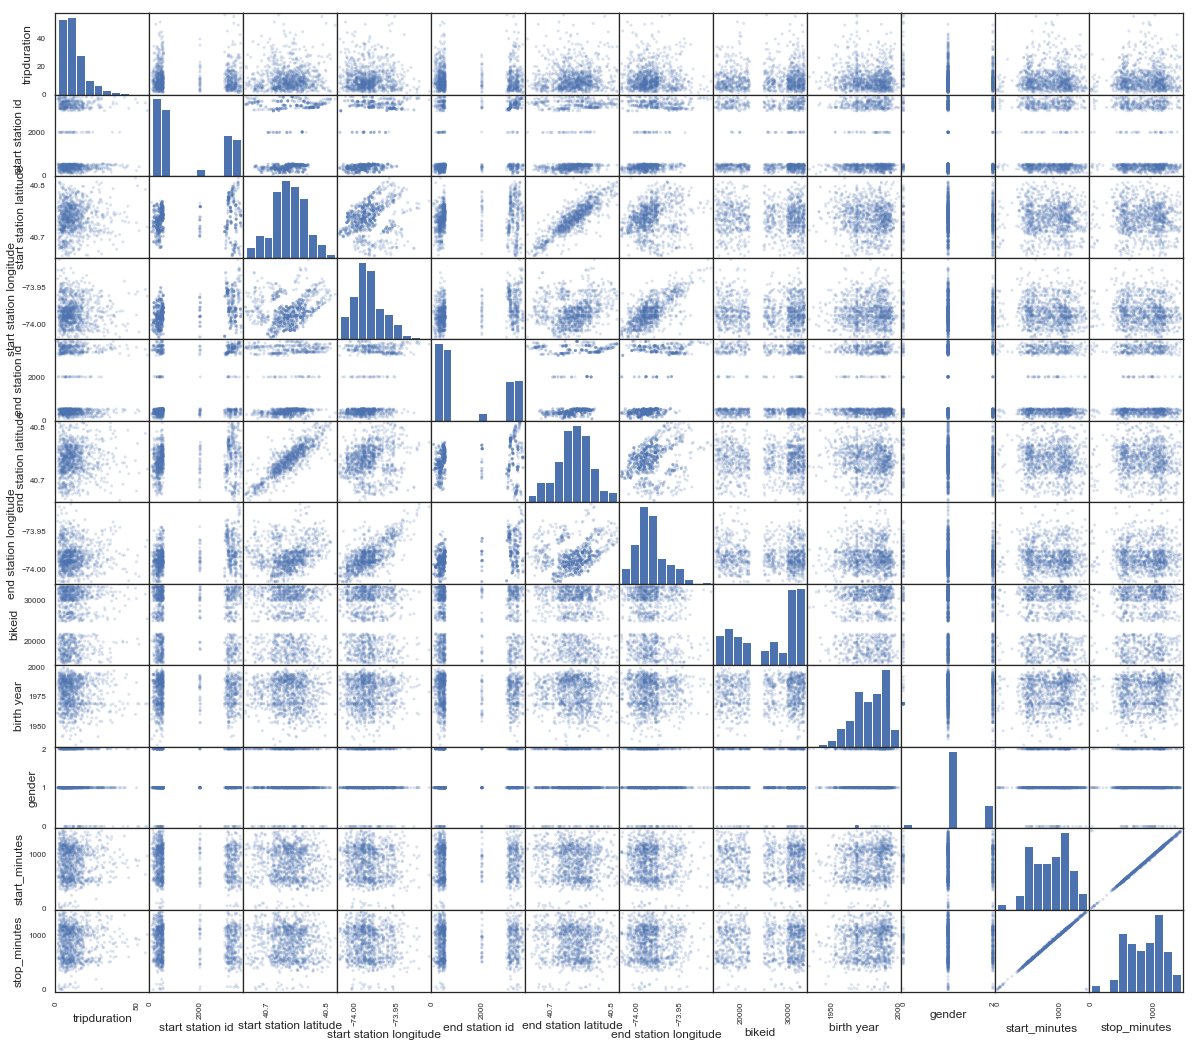

In [21]:
from pandas.plotting import  scatter_matrix
scatter_matrix(df[m].sample(1000), alpha=0.2, figsize=(18,18));

# Spearman Correlation

In [54]:
?pd.Series.corr

Signature: pd.Series.corr(self, other, method='pearson', min_periods=None)
Docstring:
Compute correlation with `other` Series, excluding missing values.

Parameters
----------
other : Series
method : {'pearson', 'kendall', 'spearman'} or callable
    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarray
        and returning a float
        .. versionadded:: 0.24.0

min_periods : int, optional
    Minimum number of observations needed to have a valid result

Returns
-------
correlation : float

Examples
--------
>>> histogram_intersection = lambda a, b: np.minimum(a, b
... ).sum().round(decimals=1)
>>> s1 = pd.Series([.2, .0, .6, .2])
>>> s2 = pd.Series([.3, .6, .0, .1])
>>> s1.corr(s2, method=histogram_intersection)
0.3
File:      ~/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py
Type:      function


![cubic](https://support.minitab.com/en-us/minitab-express/1/scatterplot_cubic_perfect_relationship.png)

Pearson = +0.851, Spearman = +1

![decrease](https://support.minitab.com/en-us/minitab-express/1/scatterplot_strictly_decreasing_exponential_relationship.png)

Pearson = −0.799, Spearman = −1

![non-linear](https://support.minitab.com/en-us/minitab-express/1/scatterplot_quadratic_model.png)

Coefficient of 0

# Statistical significance

In [22]:
from scipy.stats import pearsonr, spearmanr

In [39]:
spat_mask = m & (df['start station latitude'] < 43)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


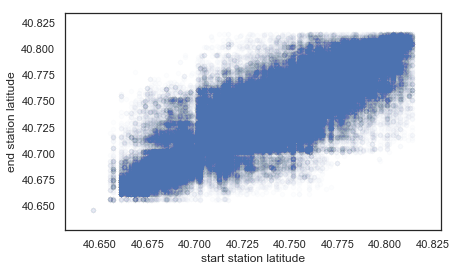

In [40]:
df[spat_mask].plot(kind='scatter', x='start station latitude', y='end station latitude', alpha=.01)

In [42]:
pearsonr(df.loc[spat_mask, 'start station latitude'], df.loc[spat_mask, 'end station latitude'])

(0.8630905704632994, 0.0)

# Квартет Вискомбе

![wiscombi quartet](http://www.machinelearning.ru/wiki/images/thumb/3/35/Correlation.png/300px-Correlation.png)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


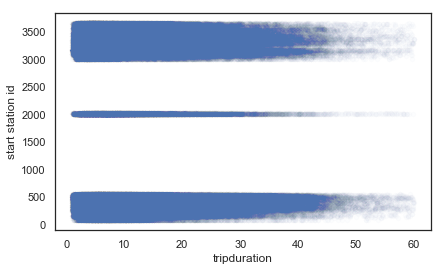

In [47]:
df[spat_mask].plot(kind='scatter', x='tripduration', y='start station id', alpha=.01)

In [48]:
spearmanr(df.loc[spat_mask, 'tripduration'], df.loc[spat_mask, 'start station id'])

SpearmanrResult(correlation=0.012563478102052739, pvalue=2.1369593506796582e-26)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


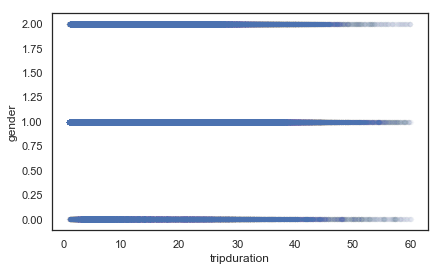

In [52]:
df[spat_mask].plot(kind='scatter', x='tripduration', y='gender', alpha=.01)

In [53]:
spearmanr(df.loc[spat_mask, 'tripduration'], df.loc[spat_mask, 'gender'])

SpearmanrResult(correlation=0.016786817302409413, pvalue=8.50320212754661e-46)